In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry

In [1]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('data/CSVData_Military.csv', encoding = "ISO-8859-1")
df.head(10)
#read the dataset file into a dataframe
#display the head() of the dataframe

Keyword     tweet_id     author_id                created_at  \
0  U.S Army  1.34479E+18  9.923952e+08  2020-12-31T23:20:41.000Z   
1  U.S Army  1.34467E+18  8.819740e+17  2020-12-31T15:49:59.000Z   
2  U.S Army  1.34463E+18  2.364428e+08  2020-12-31T12:55:51.000Z   
3  U.S Army   1.3444E+18  3.075639e+09  2020-12-30T21:36:43.000Z   
4  U.S Army  1.34439E+18  8.291950e+17  2020-12-30T21:27:21.000Z   
5  U.S Army  1.34434E+18  8.721180e+17  2020-12-30T17:45:58.000Z   
6  U.S Army  1.34428E+18  1.598813e+09  2020-12-30T13:55:14.000Z   
7  U.S Army  1.34398E+18  4.706974e+07  2020-12-29T18:03:59.000Z   
8  U.S Army  1.34398E+18  1.324470e+18  2020-12-29T18:01:49.000Z   
9  U.S Army  1.34395E+18  1.253450e+18  2020-12-29T16:14:56.000Z   

           place_id                                         tweet_text  
0  472859b07b6dc7b2  .@USArmy Special Tributes by Pastor Rose Banks...  
1  55b4f9e5c516e0b6  In recognition of our work with the National G...  
2  7eeed20da9c42064  A little fun fact about me: I was born in Taiw...  
3  f3cbe8607ff8ebaa                      When I entered the U. S. Army  
4  49af5b43d4963f4c                               Abortion? I told you  
5  f08121d6e5629f7f                                         On Dec. 29  
6  5faafada28b440c3  Does U.S. Army have any responsibility for rei...  
7  27c45d804c777999                                On this day in 1890  
8  ac88a4f17a51c7fc  In the 70's the American Indian Movement took ...  
9  58fe33e6473d1519                                            In 1890

In [3]:
print(df.shape[0])

50620


In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/onercelepcikay/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True


*****Year: 2010*****
Total Tweets:  670
Positive Tweets:  271  % 40.4
Negative Tweets:  194  % 29.0
Neutral Tweets:  205  % 30.6


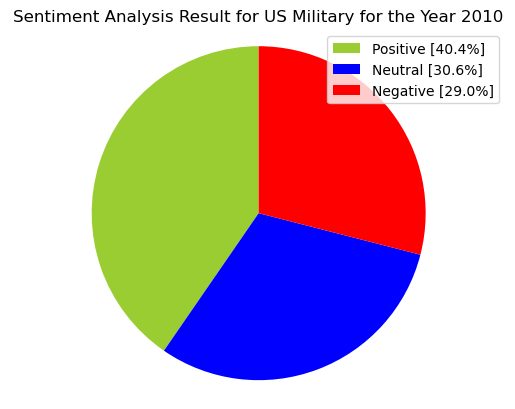


*****Year: 2011*****
Total Tweets:  1031
Positive Tweets:  374  % 36.3
Negative Tweets:  310  % 30.1
Neutral Tweets:  347  % 33.7


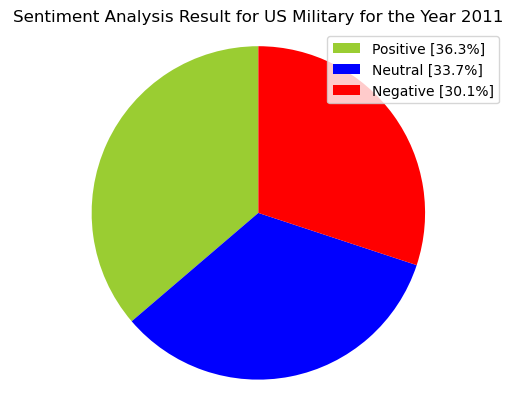


*****Year: 2012*****
Total Tweets:  1159
Positive Tweets:  434  % 37.4
Negative Tweets:  351  % 30.3
Neutral Tweets:  374  % 32.3


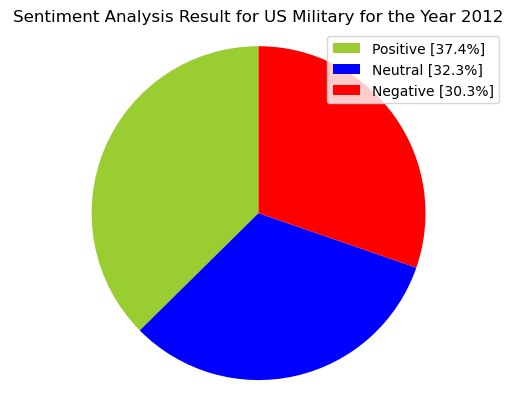


*****Year: 2013*****
Total Tweets:  1112
Positive Tweets:  441  % 39.7
Negative Tweets:  348  % 31.3
Neutral Tweets:  323  % 29.0


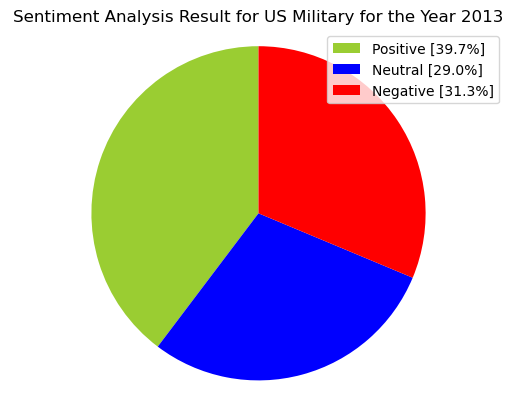


*****Year: 2014*****
Total Tweets:  1151
Positive Tweets:  442  % 38.4
Negative Tweets:  334  % 29.0
Neutral Tweets:  375  % 32.6


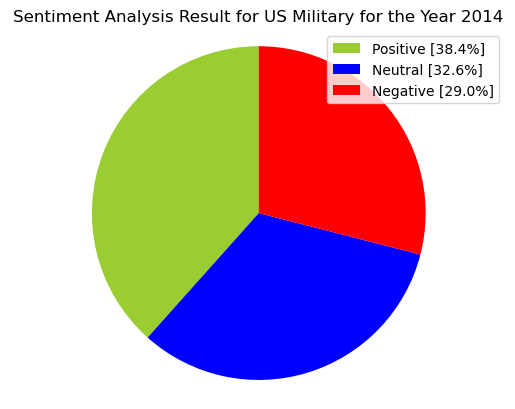


*****Year: 2015*****
Total Tweets:  1182
Positive Tweets:  426  % 36.0
Negative Tweets:  382  % 32.3
Neutral Tweets:  374  % 31.6


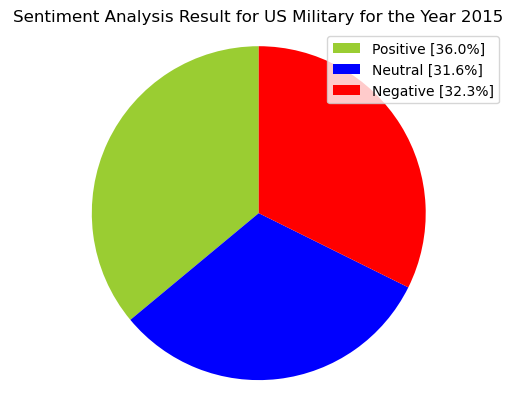


*****Year: 2016*****
Total Tweets:  1218
Positive Tweets:  437  % 35.9
Negative Tweets:  388  % 31.9
Neutral Tweets:  393  % 32.3


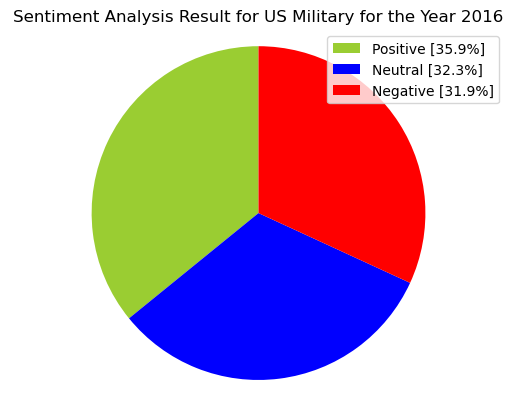


*****Year: 2017*****
Total Tweets:  1170
Positive Tweets:  428  % 36.6
Negative Tweets:  387  % 33.1
Neutral Tweets:  355  % 30.3


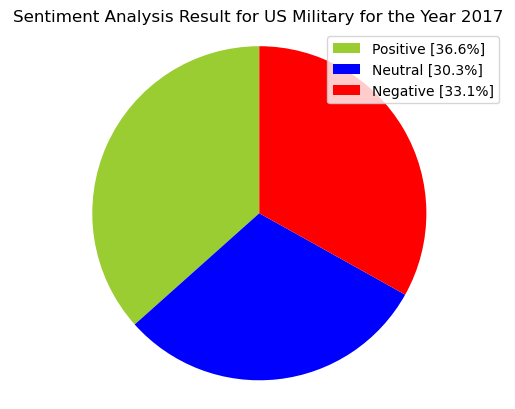


*****Year: 2018*****
Total Tweets:  1167
Positive Tweets:  455  % 39.0
Negative Tweets:  392  % 33.6
Neutral Tweets:  320  % 27.4


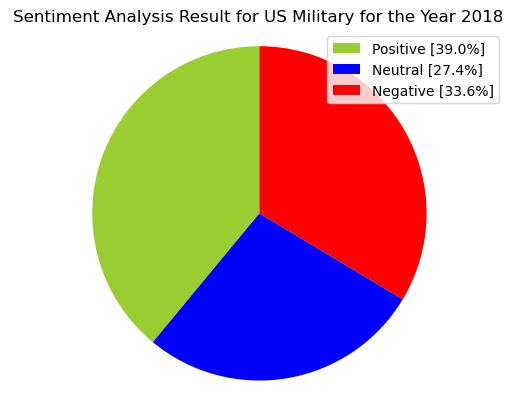


*****Year: 2019*****
Total Tweets:  1181
Positive Tweets:  487  % 41.2
Negative Tweets:  367  % 31.1
Neutral Tweets:  327  % 27.7


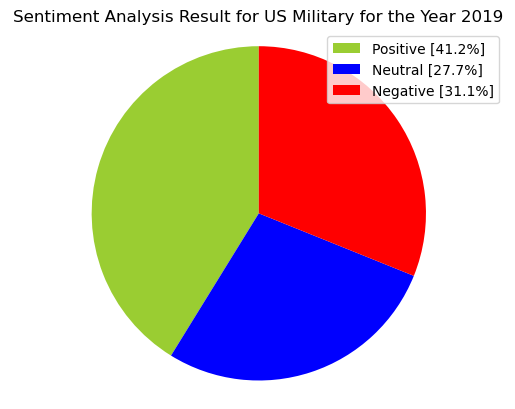


*****Year: 2020*****
Total Tweets:  1231
Positive Tweets:  402  % 32.7
Negative Tweets:  408  % 33.1
Neutral Tweets:  421  % 34.2


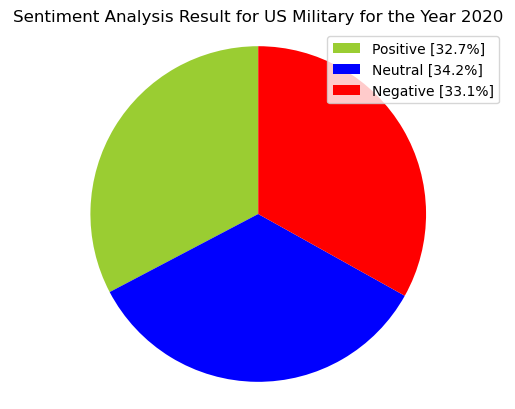

    year       pos       neg      diff
0   2010  0.404478  0.289552  0.114925
1   2011  0.362755  0.300679  0.062076
2   2012  0.374461  0.302847  0.071613
3   2013  0.396583  0.312950  0.083633
4   2014  0.384014  0.290182  0.093831
5   2015  0.360406  0.323181  0.037225
6   2016  0.358785  0.318555  0.040230
7   2017  0.365812  0.330769  0.035043
8   2018  0.389889  0.335904  0.053985
9   2019  0.412362  0.310754  0.101609
10  2020  0.326564  0.331438 -0.004874


In [8]:
cols = ['year','pos','neg','diff']
lst = []

for year in range (2010,2021): 
    rows=0 
    positive = 0 
    negative = 0 
    neutral = 0 
    polarity = 0 
    tweet_list = [] 
    neutral_list = [] 
    negative_list = [] 
    positive_list = [] 
    startdate = str(year)+"-1-1" 
    stopdate = str(year)+"-12-31" 
    filterdate = (df["created_at"] >= startdate ) & (df["created_at"] <= stopdate) 
    df_filtered= df.loc[filterdate] 
    size = df_filtered.shape[0]
    # print(size) 
    rows = rows+size# print(rows)# print(startdate+ " .. "+ stopdate + " --> " +str(size))

    noOfTweet = size
    df_tweets = df_filtered ['tweet_text']
    
    for tweet in df_tweets: 

        #print("Type of tweet: ", type(tweet)) 
        tweet_list.append(tweet) 
        analysis = TextBlob(tweet) 
        score = SentimentIntensityAnalyzer().polarity_scores(tweet) 
        neg = score['neg'] 
        neu = score['neu'] 
        pos = score['pos'] 
        comp = score['compound'] 
        polarity += analysis.sentiment.polarity 

        if neg > pos: 
            negative_list.append(tweet) 
            negative += 1 
        elif pos > neg: 
            positive_list.append(tweet) 
            positive += 1 
        elif pos == neg: 
            neutral_list.append(tweet) 
            neutral += 1 

    positive_per = 100 * float(positive)/float(noOfTweet)
    negative_per = 100 * float(negative)/float(noOfTweet)
    neutral_per = 100 * float(neutral)/float(noOfTweet)
    polarity_per = 100 * float(polarity)/float(noOfTweet)

    lst.append ([year, positive_per/100, negative_per/100, positive_per/100 - negative_per/100])

    positive_per = format(positive_per, '.1f') 
    negative_per = format(negative_per, '.1f') 
    neutral_per = format(neutral_per, '.1f')

    #Number of Tweets (Total, Positive, Negative, Neutral) 
    tweet_list = pd.DataFrame(tweet_list) 
    neutral_list = pd.DataFrame(neutral_list) 
    negative_list = pd.DataFrame(negative_list) 
    positive_list = pd.DataFrame(positive_list) 
    print("\n*****Year: "+startdate[:4]+"*****") 
    print("Total Tweets: ",len(tweet_list)) 
    print("Positive Tweets: ",len(positive_list), " %", positive_per) 
    print("Negative Tweets: ", len(negative_list), " %", negative_per) 
    print("Neutral Tweets: ",len(neutral_list), " %", neutral_per)


    #Creating PieCart 
    labels = ['Positive ['+str(positive_per)+'%]' , 'Neutral ['+str(neutral_per)+'%]', 'Negative ['+str(negative_per)+'%]'] 
    sizes = [positive_per, neutral_per, negative_per] 
    colors = ['yellowgreen', 'blue','red'] 
    patches, texts = plt.pie(sizes,colors=colors, startangle=90) 
    plt.style.use('default') 
    plt.legend(labels) 
    plt.title("Sentiment Analysis Result for US Military for the Year "+startdate[:4] ) 
    plt.axis('equal') 
    plt.show() 
              
df_summary = pd.DataFrame(lst, columns=cols)
print(df_summary)
df_summary.to_csv ('Sentiments_Military.csv', index = False, header=True)



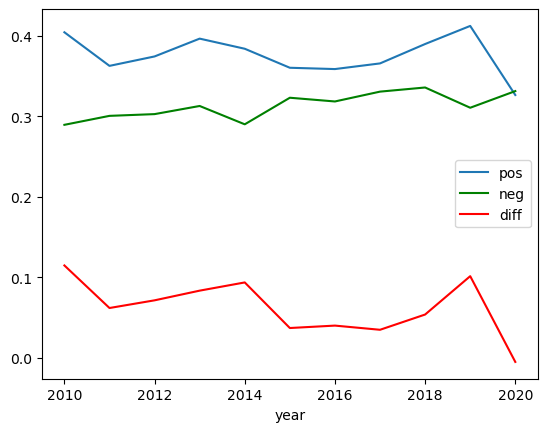

In [10]:
ax = plt.gca()

df_summary.plot(kind='line',x='year',y='pos',ax=ax)
df_summary.plot(kind='line',x='year',y='neg', color='green', ax=ax)
df_summary.plot(kind='line',x='year',y='diff', color='red', ax=ax)

plt.show()

In [81]:
df.shape[0]

pos=0.35
neg =0.17

cols = ['year','pos','neg']
lst = []

for y in range(2010,2021):
    lst.append ([y, pos, neg])

df_summary = pd.DataFrame(lst, columns=cols)
 
print(df_summary)


    year   pos   neg
0   2010  0.35  0.17
1   2011  0.35  0.17
2   2012  0.35  0.17
3   2013  0.35  0.17
4   2014  0.35  0.17
5   2015  0.35  0.17
6   2016  0.35  0.17
7   2017  0.35  0.17
8   2018  0.35  0.17
9   2019  0.35  0.17
10  2020  0.35  0.17


Year  Budget    RSV
0  2010  21.953  28.17
1  2011  20.967  30.50
2  2012  19.789  29.17
3  2013  18.511  21.25
4  2014  19.058  22.25
5  2015  19.426  26.83
6  2016  20.560  21.75
7  2017  20.348  31.25
8  2018  21.112  22.00
9  2019  21.500  22.50

In [96]:
df_summary.append(df_values)

year       pos       neg      diff    Year  Budget    RSV
0   2010.0  0.372951  0.135246  0.237705     NaN     NaN    NaN
1   2011.0  0.342803  0.110795  0.232008     NaN     NaN    NaN
2   2012.0  0.389816  0.125209  0.264608     NaN     NaN    NaN
3   2013.0  0.391416  0.122747  0.268670     NaN     NaN    NaN
4   2014.0  0.365706  0.133536  0.232170     NaN     NaN    NaN
5   2015.0  0.346095  0.117152  0.228943     NaN     NaN    NaN
6   2016.0  0.378210  0.155642  0.222568     NaN     NaN    NaN
7   2017.0  0.412097  0.132258  0.279839     NaN     NaN    NaN
8   2018.0  0.404130  0.164454  0.239676     NaN     NaN    NaN
9   2019.0  0.409231  0.128462  0.280769     NaN     NaN    NaN
10  2020.0  0.430931  0.154655  0.276276     NaN     NaN    NaN
0      NaN       NaN       NaN       NaN  2010.0  21.953  28.17
1      NaN       NaN       NaN       NaN  2011.0  20.967  30.50
2      NaN       NaN       NaN       NaN  2012.0  19.789  29.17
3      NaN       NaN       NaN       NaN  2013.0  18.511  21.25
4      NaN       NaN       NaN       NaN  2014.0  19.058  22.25
5      NaN       NaN       NaN       NaN  2015.0  19.426  26.83
6      NaN       NaN       NaN       NaN  2016.0  20.560  21.75
7      NaN       NaN       NaN       NaN  2017.0  20.348  31.25
8      NaN       NaN       NaN       NaN  2018.0  21.112  22.00
9      NaN       NaN       NaN       NaN  2019.0  21.500  22.50
10     NaN       NaN       NaN       NaN  2020.0  22.629  25.67